# CICIDS2017

## EDA and Preprocessing

In [1]:
# Basic imports
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-29 10:03:12.944261: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 10:03:12.944304: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 10:03:12.944334: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-29 10:03:12.951665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1=pd.read_csv(r"../dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv(r"../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df3=pd.read_csv(r"../dataset/Monday-WorkingHours.pcap_ISCX.csv")
df4=pd.read_csv(r"../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df5=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df6=pd.read_csv(r"../dataset/Wednesday-workingHours.pcap_ISCX.csv")
df7=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df8=pd.read_csv(r"../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [3]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [6]:
df.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

In [8]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

307078 fully duplicate rows to remove


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520798 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [12]:
df_encoded = df.copy()

le = LabelEncoder()

df_encoded[' Label'] = le.fit_transform(df[' Label'])

X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

In [13]:
X = df.drop(' Label', axis=1)
y = df[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print(y_train.value_counts())

 Label
BENIGN                        1676045
DoS Hulk                       138277
DDoS                           102411
PortScan                        72555
DoS GoldenEye                    8229
FTP-Patator                      4745
DoS slowloris                    4308
DoS Slowhttptest                 4182
SSH-Patator                      2575
Bot                              1558
Web Attack � Brute Force         1176
Web Attack � XSS                  522
Infiltration                       29
Web Attack � Sql Injection         17
Heartbleed                          9
Name: count, dtype: int64


In [15]:
sampling_strategy_over = {
    "DoS Hulk": 200000, 
    "DDoS": 150000, 
    "PortScan": 100000, 
    "DoS GoldenEye": 10000, 
    "FTP-Patator": 7000, 
    "DoS slowloris": 7000, 
    "DoS Slowhttptest": 7000, 
    "SSH-Patator": 5000, 
    "Bot": 3000, 
    "Web Attack � Brute Force": 2000, 
    "Web Attack � XSS": 1500, 
    "Infiltration": 1500, 
    "Web Attack � Sql Injection": 1500, 
    "Heartbleed": 1500
}

# undersampling the majority class
sampling_strategy_under = {
    "BENIGN": 500000  
}

In [16]:
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)

X_train_res, y_train_res = over.fit_resample(X_train, y_train)
X_train_res, y_train_res= under.fit_resample(X_train_res, y_train_res)

print(y_train_res.value_counts())


 Label
BENIGN                        500000
DoS Hulk                      200000
DDoS                          150000
PortScan                      100000
DoS GoldenEye                  10000
DoS Slowhttptest                7000
DoS slowloris                   7000
FTP-Patator                     7000
SSH-Patator                     5000
Bot                             3000
Web Attack � Brute Force        2000
Heartbleed                      1500
Infiltration                    1500
Web Attack � Sql Injection      1500
Web Attack � XSS                1500
Name: count, dtype: int64


In [17]:
# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_res)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [18]:
!nvidia-smi

Tue Mar 26 10:22:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:01:00.0 Off |                    0 |
| N/A   44C    P0             66W /  300W |    6310MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [21]:
%env CUDA_VISIBLE_DEVICES=1


env: CUDA_VISIBLE_DEVICES=1


In [18]:


# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(32, activation='tanh', input_shape=(X_train_scaled.shape[1], 1)))  # Reduced units
model_lstm.add(Dense(y_train_one_hot.shape[1], activation='softmax'))  # Removed extra layers


# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_lstm = model_lstm.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

2024-03-29 10:04:20.981167: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 71464 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:01:00.0, compute capability: 8.0
2024-03-29 10:04:20.982623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78645 MB memory:  -> device: 1, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:81:00.0, compute capability: 8.0


Epoch 1/10


2024-03-29 10:04:23.768718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-29 10:04:23.816031: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x14305010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-29 10:04:23.816062: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-03-29 10:04:23.816069: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-03-29 10:04:23.821198: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-29 10:04:23.900081: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31157/31157 [==============================] - 236s 8ms/step - loss: 0.4362 - accuracy: 0.8669 - val_loss: 0.3707 - val_accuracy: 0.8730
Epoch 2/10
31157/31157 [==============================] - 236s 8ms/step - loss: 0.2451 - accuracy: 0.9235 - val_loss: 0.1220 - val_accuracy: 0.9586
Epoch 3/10
31157/31157 [==============================] - 237s 8ms/step - loss: 0.1638 - accuracy: 0.9460 - val_loss: 0.1205 - val_accuracy: 0.9465
Epoch 4/10
31157/31157 [==============================] - 236s 8ms/step - loss: 0.1395 - accuracy: 0.9526 - val_loss: 0.1284 - val_accuracy: 0.9577
Epoch 5/10
31157/31157 [==============================] - 236s 8ms/step - loss: 0.1330 - accuracy: 0.9555 - val_loss: 0.0911 - val_accuracy: 0.9643
Epoch 6/10
31157/31157 [==============================] - 237s 8ms/step - loss: 0.1138 - accuracy: 0.9630 - val_loss: 0.0959 - val_accuracy: 0.9646
Epoch 7/10
31157/31157 [==============================] - 236s 8ms/step - loss: 0.1180 - accuracy: 0.9623 - val_loss: 0.083

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_lstm.evaluate(X_test_scaled, y_test_one_hot)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

15755/15755 [==============================] - 53s 3ms/step - loss: 0.0803 - accuracy: 0.9671
Test Accuracy: 96.71%
Test Loss: 8.03%


In [20]:
# Predict the classes with the model
y_pred = model_lstm.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_true = np.argmax(y_test_one_hot, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

15755/15755 [==============================] - 47s 3ms/step


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      0.96      0.98    419012
                       Bot       0.54      0.59      0.56       390
                      DDoS       0.98      0.98      0.98     25603
             DoS GoldenEye       0.92      0.92      0.92      2057
                  DoS Hulk       0.89      1.00      0.94     34569
          DoS Slowhttptest       0.79      0.98      0.88      1046
             DoS slowloris       0.89      0.86      0.87      1077
               FTP-Patator       0.88      0.99      0.94      1186
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.02      0.14      0.04         7
                  PortScan       0.68      1.00      0.81     18139
               SSH-Patator       0.94      0.90      0.92       644
  Web Attack � Brute Force       0.13      0.82      0.22       294
Web Attack � Sql Injection       0.01      0.25

/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Precision: 0.9759819577117217
Recall: 0.9670640272929228
F1 Score: 0.9698351729414324
Accuracy: 0.9670640272929228


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


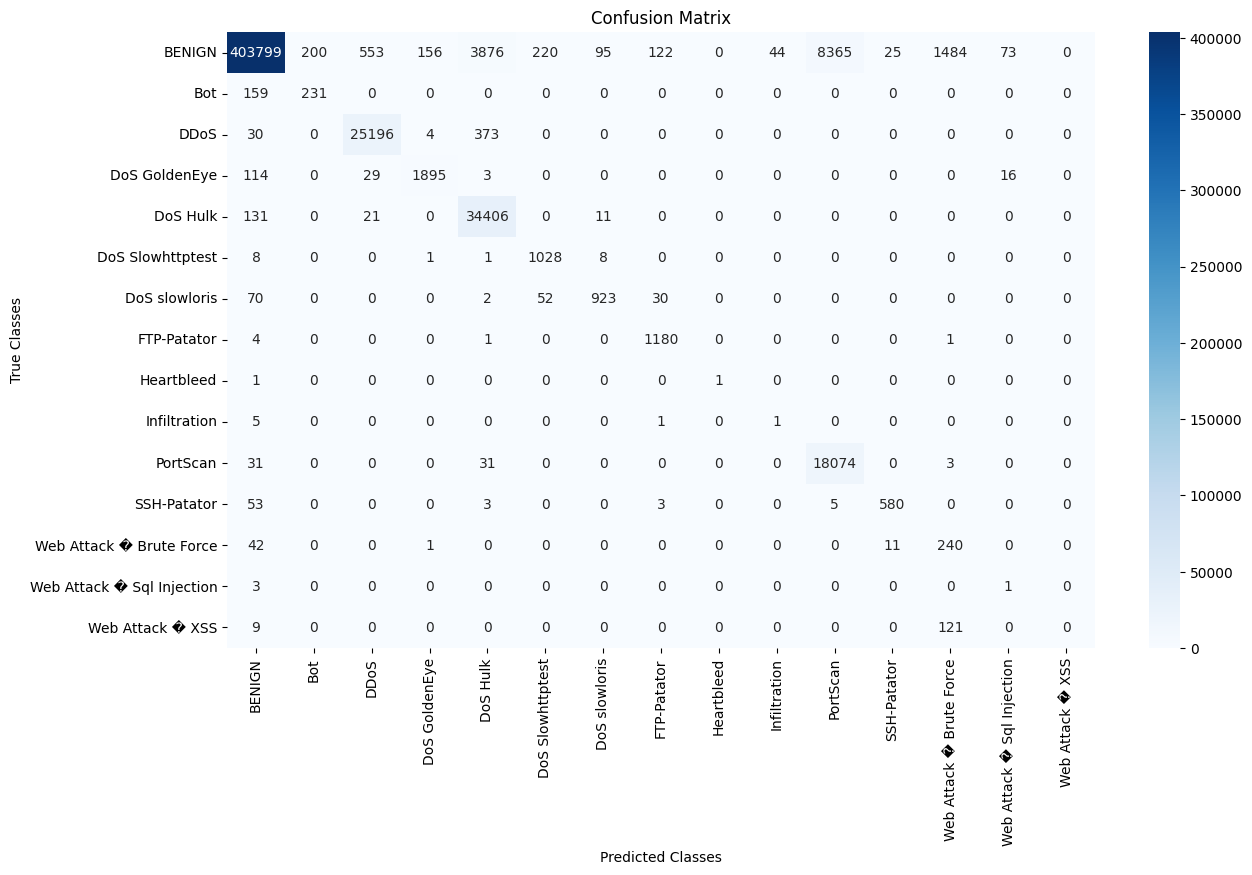

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(14, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

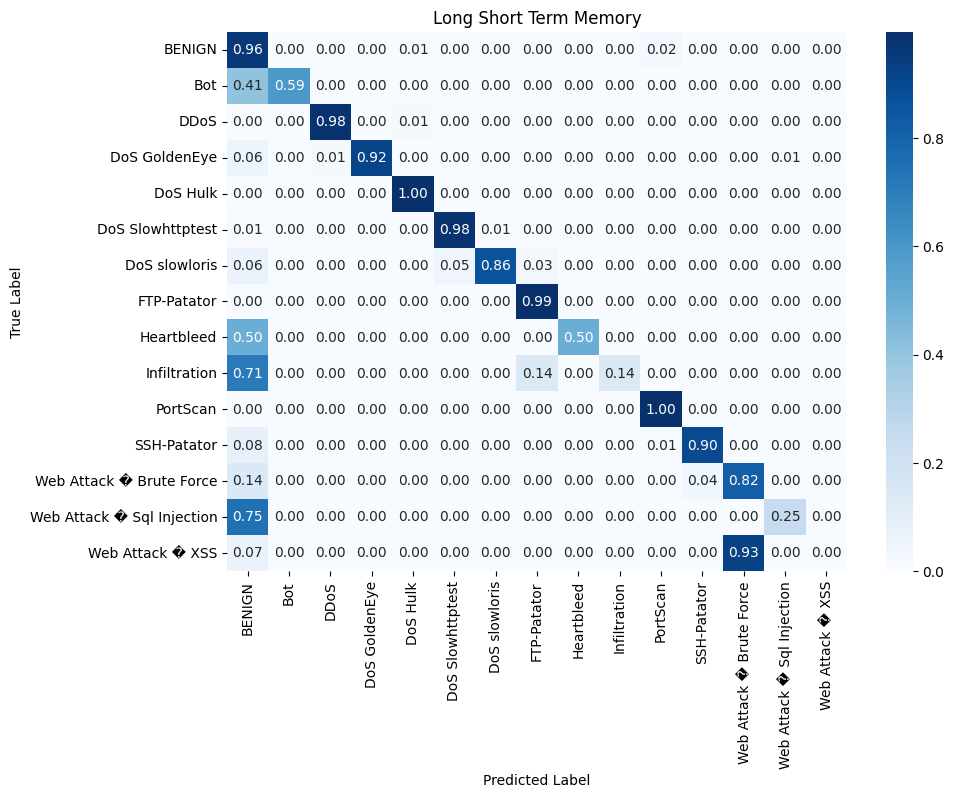

In [24]:
# Normalize the confusion matrix by rows
row_sums = conf_matrix.sum(axis=1)
conf_matrix_normalized = conf_matrix / row_sums[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Long Short Term Memory")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## LSTM with fine tuning

In [25]:
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Initialize the fine-tuned model
model_lstm_fine_tuned = Sequential()
model_lstm_fine_tuned.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model_lstm_fine_tuned.add(Dropout(0.2))
model_lstm_fine_tuned.add(LSTM(32, activation='tanh'))
model_lstm_fine_tuned.add(Dropout(0.2))
model_lstm_fine_tuned.add(Dense(50, activation='relu'))
model_lstm_fine_tuned.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_lstm_fine_tuned.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tuned = model_lstm_fine_tuned.fit(
    X_train_scaled, y_train_one_hot, 
    epochs=10,
    batch_size=32,  
    validation_data=(X_test_scaled, y_test_one_hot), 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
31157/31157 [==============================] - 407s 13ms/step - loss: 0.8669 - accuracy: 0.7207 - val_loss: 0.3465 - val_accuracy: 0.8589 - lr: 1.0000e-04
Epoch 2/10
31157/31157 [==============================] - 404s 13ms/step - loss: 0.4531 - accuracy: 0.8454 - val_loss: 0.2284 - val_accuracy: 0.9216 - lr: 1.0000e-04
Epoch 3/10
31157/31157 [==============================] - 405s 13ms/step - loss: 0.3274 - accuracy: 0.8915 - val_loss: 0.1879 - val_accuracy: 0.9356 - lr: 1.0000e-04
Epoch 4/10
31157/31157 [==============================] - 403s 13ms/step - loss: 0.2607 - accuracy: 0.9146 - val_loss: 0.1470 - val_accuracy: 0.9507 - lr: 1.0000e-04
Epoch 5/10
31157/31157 [==============================] - 404s 13ms/step - loss: 0.2237 - accuracy: 0.9276 - val_loss: 0.1402 - val_accuracy: 0.9469 - lr: 1.0000e-04
Epoch 6/10
31157/31157 [==============================] - 404s 13ms/step - loss: 0.2008 - accuracy: 0.9343 - val_loss: 0.1243 - val_accuracy: 0.9550 - lr: 1.0000e-04
Epoc

In [26]:
test_loss, test_accuracy = model_lstm_fine_tuned.evaluate(X_test_scaled, y_test_one_hot)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

15755/15755 [==============================] - 76s 5ms/step - loss: 0.0933 - accuracy: 0.9637
Test Accuracy: 96.37%
Test Loss: 9.33%


In [27]:
# Predict the classes with the model
y_pred = model_lstm_fine_tuned.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_true = np.argmax(y_test_one_hot, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

15755/15755 [==============================] - 68s 4ms/step


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      0.96      0.98    419012
                       Bot       0.59      0.60      0.60       390
                      DDoS       0.95      0.96      0.95     25603
             DoS GoldenEye       0.85      0.88      0.87      2057
                  DoS Hulk       0.87      0.99      0.93     34569
          DoS Slowhttptest       0.74      0.95      0.83      1046
             DoS slowloris       0.72      0.89      0.80      1077
               FTP-Patator       0.87      0.99      0.93      1186
                Heartbleed       0.11      1.00      0.19         2
              Infiltration       0.01      0.14      0.01         7
                  PortScan       0.70      0.99      0.82     18139
               SSH-Patator       0.82      0.90      0.86       644
  Web Attack � Brute Force       0.00      0.00      0.00       294
Web Attack � Sql Injection       0.00      0.00

/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.9727673682234417
Recall: 0.9637059663598857
F1 Score: 0.9666213639531632
Accuracy: 0.9637059663598857


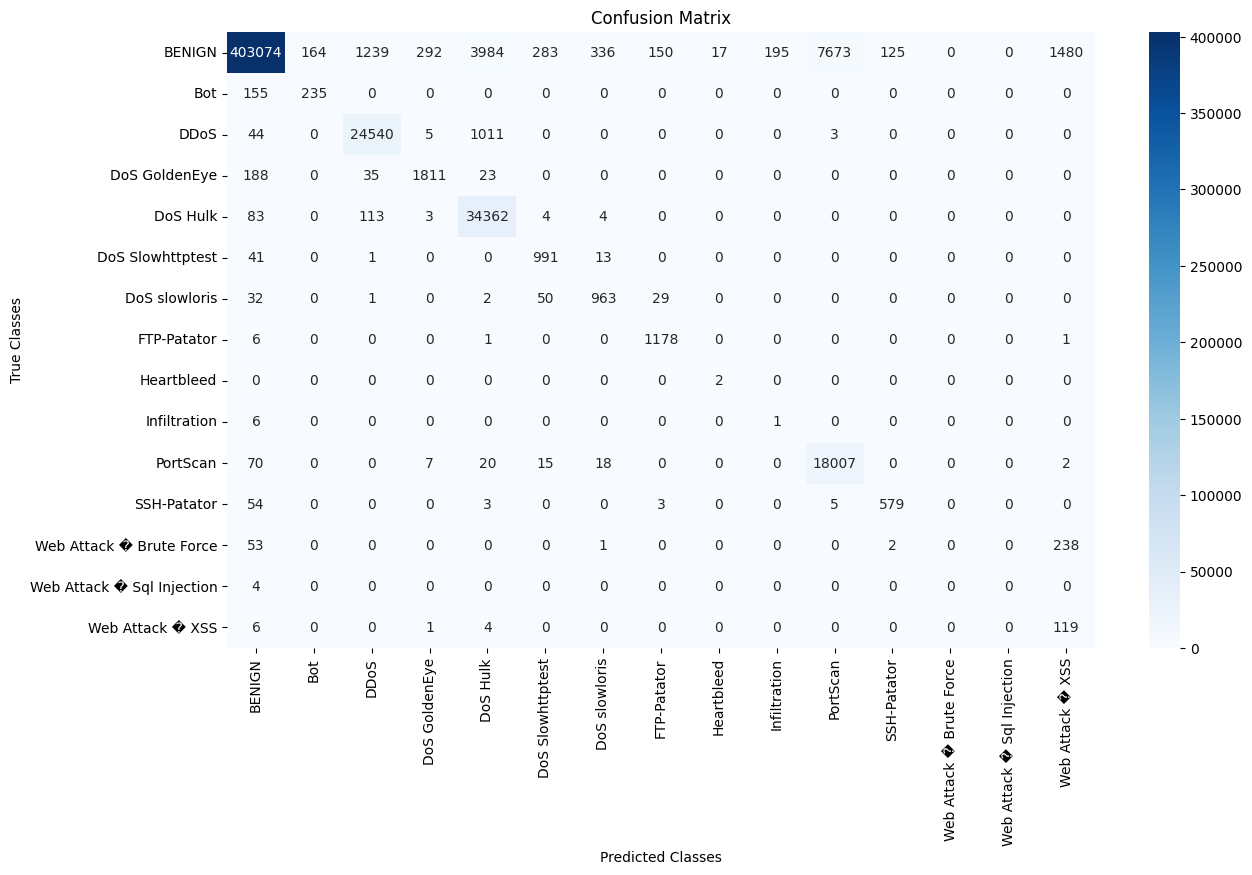

In [29]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(14, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

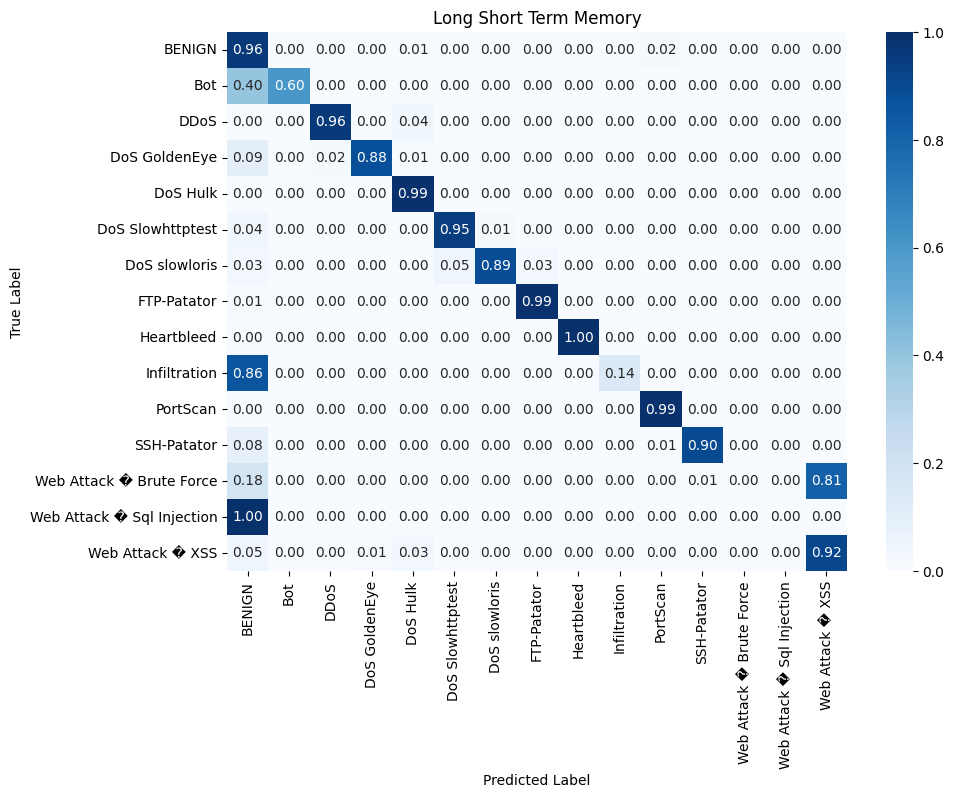

In [30]:
# Normalize the confusion matrix by rows
row_sums = conf_matrix.sum(axis=1)
conf_matrix_normalized = conf_matrix / row_sums[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Long Short Term Memory")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support


precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='macro')
print(f"Micro Average Precision: {precision_micro:.4f}")
print(f"Micro Average Recall: {recall_micro:.4f}")
print(f"Micro Average F1-Score: {f1_score_micro:.4f}")

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Micro Average Precision: 0.5521
Micro Average Recall: 0.7455
Micro Average F1-Score: 0.5919
Precision: 0.9727673682234417
Recall: 0.9637059663598857
F1 Score: 0.9666213639531632
Accuracy: 0.9637059663598857


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
